In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## We will try various classification algorithms

We will try the following:
* Naive Bayes
* kNearest Neighbours
* SVM
* Gradient Descent

We mention that in this docuemnt we take the best options that we have found, after exploring the hyperparameter space for each algorithm in its own separate Notebook.

In [2]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13208
Testing sample size: 1432


In [3]:
from sklearn.metrics import confusion_matrix
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['negative', 'neutal', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'neutal', 'positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_evaluation(evaluation):
    for key, value in sorted(evaluation.items()):
        print(key, ":", value)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    y_test = [y for _, y in test]
    y_pred = [classifier.classify(f) for f, _ in test]
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print_evaluation(evaluation)
    return classifier

Unigram features 1730
Bigram features:  1205


## Naive Bayes

Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.7515233581584293
F-measure [negative] : 0.8313183649971214
F-measure [neutral] : 0.5928057553956835
F-measure [positive] : 0.6973180076628352
Precision [negative] : 0.87409200968523
Precision [neutral] : 0.544973544973545
Precision [positive] : 0.6666666666666666
Recall [negative] : 0.7925356750823271
Recall [neutral] : 0.6498422712933754
Recall [positive] : 0.7309236947791165


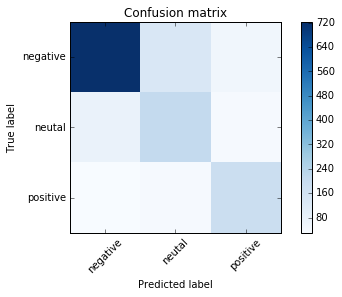

In [8]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

trainer = {
    'name': 'Naive Bayes Classifier',
    'train': SklearnClassifier(BernoulliNB(
        fit_prior = True,
        )).train,
}
naive_bayes = evaluate_trainer(trainer)


## K Nearest Neighbours

Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.5219672131147541
F-measure [negative] : 0.5983827493261455
F-measure [neutral] : 0.4224364592462752
F-measure [positive] : 0.5223529411764706
Precision [negative] : 0.7971274685816876
Precision [neutral] : 0.30238393977415307
Precision [positive] : 0.6491228070175439
Recall [negative] : 0.47896440129449835
Recall [neutral] : 0.7005813953488372
Recall [positive] : 0.43700787401574803


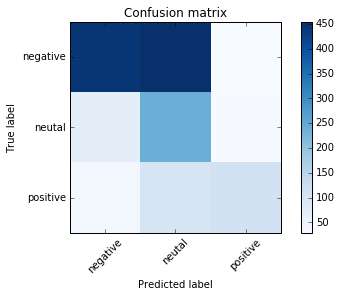

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from nltk.classify import SklearnClassifier
trainer = {
    "name": "K Nearest Neighbours Classifier",
    "train": SklearnClassifier(KNeighborsClassifier()).train,
}
knn = evaluate_trainer(trainer)

## SVM

Training: Linear SVC Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.7667597765363129
F-measure [negative] : 0.8488636363636364
F-measure [neutral] : 0.5921259842519685
F-measure [positive] : 0.6950959488272922
Precision [negative] : 0.8459796149490374
Precision [neutral] : 0.5714285714285714
Precision [positive] : 0.740909090909091
Recall [negative] : 0.8517673888255416
Recall [neutral] : 0.6143790849673203
Recall [positive] : 0.6546184738955824


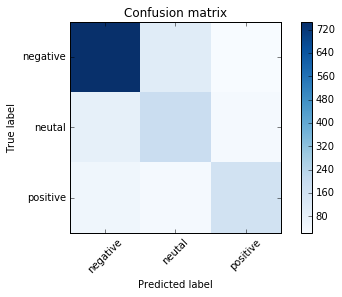

In [5]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                         C = 2,
                                        )).train,
}
svm = evaluate_trainer(trainer)